In [1]:
from main import *
from data_vis import *

In [2]:
workplace1 = address('55 Av. de Bordeaux', '42000', 'Mimizan','France')
workplace2 = address('619 Av. du Maréchal Lyautey','40600','Biscarrosse','France')

gc_1 = get_coordinates(workplace1.address)
gc_2 = get_coordinates(workplace2.address)

graph = get_roadmap(gc_1, gc_2)

21624


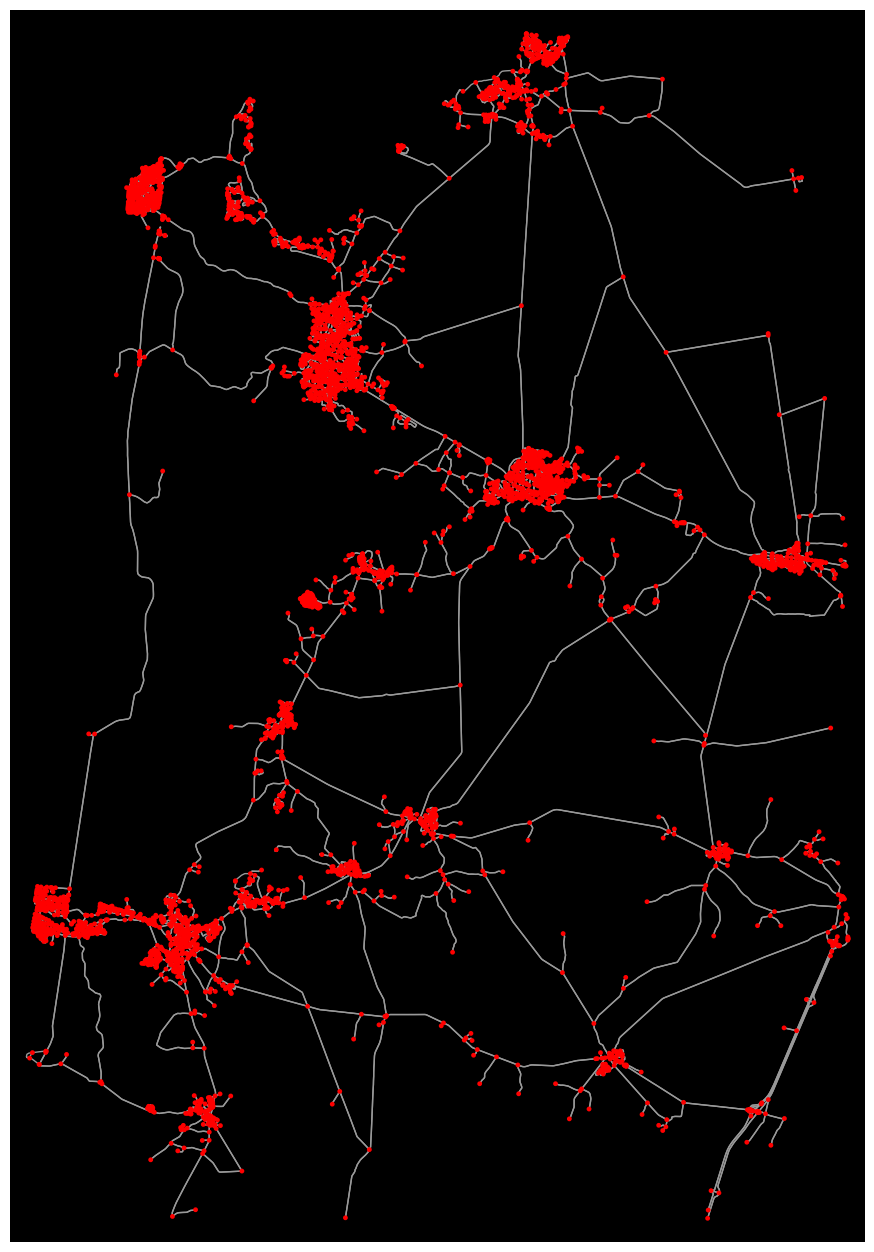

In [3]:
graph_visualisation(graph)

In [4]:
df = get_all_path_and_times(workplace1,workplace2)

21624
nodes: 4786


In [5]:
df.head(1000)


,node_number,node_x,node_y,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2
0,21460910,-1.219813,44.133323,"[21460910, 21460912, 613698870, 1523725410, 61...",631.3,"[21460910, 21460912, 613698870, 1523725410, 61...",2665.6
1,21460912,-1.217491,44.136799,"[21460912, 613698870, 1523725410, 611058957, 6...",600.4,"[21460912, 613698870, 1523725410, 611058957, 6...",2634.7
2,21460923,-1.215883,44.147966,"[21460923, 441564990, 610284858, 2008603221, 1...",486.9,"[21460923, 441564990, 610284858, 2008603221, 1...",2521.2
3,21460944,-1.229804,44.196181,"[21460944, 21460945, 1738608795, 1738608839, 2...",116.1,"[21460944, 414712865, 414712869, 414712870, 15...",2150.4
4,21460945,-1.229775,44.197879,"[21460945, 1738608795, 1738608839, 21460948, 4...",102.5,"[21460945, 21460944, 414712865, 414712869, 414...",2164.0
...,...,...,...,...,...,...,...
995,865254759,-1.183640,44.429809,"[865254759, 865254756, 865254618, 865254674, 8...",2585.4,"[865254759, 865254756, 865254618, 865254674, 8...",491.2
996,865254769,-1.184555,44.431547,"[865254769, 865254776, 865254722, 1569864271, ...",2560.5,"[865254769, 865254776, 865254722, 1569864271, ...",466.3
997,865254776,-1.184844,44.432040,"[865254776, 865254722, 1569864271, 286481735, ...",2553.4,"[865254776, 865254722, 1569864271, 286481735, ...",459.2
998,865286340,-1.178425,44.430870,"[865286340, 865236050, 865286341, 865286373, 8...",2577.4,"[865286340, 865236050, 865286341, 865286373, 8...",483.2


/var/folders/s7/9gt9jk057kj8pj43830d3rmw0000gn/T/ipykernel_45720/218660048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap[col] = heatmap[col].apply(lambda x:


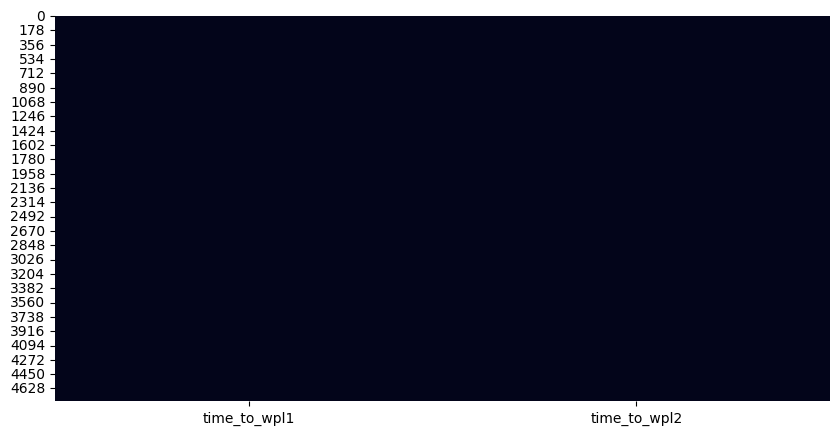

In [6]:
heatmap = df[['time_to_wpl1','time_to_wpl2']]
for col in heatmap.columns:
    heatmap[col] = heatmap[col].apply(lambda x: 
                       0.3 if pd.isnull(x) else  #nan -> purple
                      (0.7 if np.isinf(x) else   #inf -> orange
                      (0 if x!=0 else 1) ))      # 0  -> white  

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap, vmin=0, vmax=1, cbar=False, ax=ax)
plt.show()

In [7]:
# Calculate the sum of 'time_to_wpl1' and 'time_to_wpl2' columns
first_10_min_rows = top_10_fastest_routes(df)
first_10_min_rows['id'] =  2

results = first_10_min_rows.drop(['path_to_wpl1',	'time_to_wpl1',	'path_to_wpl2',	'time_to_wpl2', 'sum_times',	'diff_times',	'tot_times'],axis=1)
results

,node_number,node_x,node_y,id
1033,884202011,-1.154651,44.312820,2
3499,4071312869,-1.156543,44.310330,2
3501,4071312871,-1.153417,44.314250,2
3500,4071312870,-1.152439,44.313835,2
3498,4071312866,-1.155800,44.309641,2
3503,4071312878,-1.152362,44.315513,2
3504,4071312880,-1.152193,44.315773,2
3849,5155447225,-1.151039,44.310691,2
3502,4071312872,-1.151554,44.314519,2
4200,6238639980,-1.154854,44.316408,2


In [8]:
# creating pandas dataframe to stock the value
dtf = pd.DataFrame(data={'node_number': [10, 11],
                         'id': [0,1],
                         'node_y': [gc_1[0],gc_2[0]],
                         'node_x': [gc_1[1],gc_2[1]]})

dtf



,node_number,id,node_y,node_x
0,10,0,44.202611,-1.229633
1,11,1,44.390746,-1.160326


In [9]:
end_dtf  = pd.concat([dtf, results])
end_dtf

,node_number,id,node_y,node_x
0,10,0,44.202611,-1.229633
1,11,1,44.390746,-1.160326
1033,884202011,2,44.312820,-1.154651
3499,4071312869,2,44.310330,-1.156543
3501,4071312871,2,44.314250,-1.153417
3500,4071312870,2,44.313835,-1.152439
3498,4071312866,2,44.309641,-1.155800
3503,4071312878,2,44.315513,-1.152362
3504,4071312880,2,44.315773,-1.152193
3849,5155447225,2,44.310691,-1.151039


In [10]:
map_ = map_visualisation(get_mid_geolocalisation(gc_1,gc_2), end_dtf)

start_node, end_node = get_close_nodes(graph,gc_1,gc_2)
print(start_node)

path1 = nx.shortest_path(graph, 884210349, start_node, weight='travel_time')
path2 = nx.shortest_path(graph, 884210349, end_node, weight='travel_time')

ox.plot_route_folium(graph, route=path1, route_map=map_, color="blue", weight=1)
ox.plot_route_folium(graph, route=path2, route_map=map_, color="red", weight=1)


map_

/var/folders/s7/9gt9jk057kj8pj43830d3rmw0000gn/T/ipykernel_45720/3293118002.py:9: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(graph, route=path1, route_map=map_, color="blue", weight=1)
/var/folders/s7/9gt9jk057kj8pj43830d3rmw0000gn/T/ipykernel_45720/3293118002.py:10: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations

[0, 1, 2]
5489432402


In [11]:
#ox.plot_route_folium(graph, route=result_row['path_to_wpl1'], route_map=map_, 
#                     color="red", weight=1)
#ox.plot_route_folium(graph, route=result_row['path_to_wpl2'], route_map=map_, 
#                     color="blue", weight=1)
# map_

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, vertical_spacing=0.15)
print(len(df['sum_times']), '&', len(df['diff_times']))
# Scatter plot
scatter_trace = go.Scatter(x=df['time_to_wpl1'], y=df['time_to_wpl2'], mode='markers')
fig.add_trace(scatter_trace, row=1, col=1)
scatter_trace2 = go.Scatter(x=df['sum_times'], y=df['diff_times'], mode='markers')
fig.add_trace(scatter_trace2, row=2, col=1)

# Histogram
histogram_trace = go.Histogram(x=df['sum_times'], nbinsx=int(df['sum_times'].max() / 10) + 1)
fig.add_trace(histogram_trace, row=1, col=2)
histogram_trace2 = go.Histogram(x=df['diff_times'], nbinsx=int(df['diff_times'].max() / 10) + 1)
fig.add_trace(histogram_trace2, row=2, col=2)

# Update layout for the scatter plot
fig.update_xaxes(title_text='Time Travel to Workplace 1', row=1, col=1)
fig.update_yaxes(title_text='Time Travel to Workplace 2', row=1, col=1)

fig.update_xaxes(title_text='sum_times', row=2, col=1)
fig.update_yaxes(title_text='diff_times', row=2, col=1)

fig.update_layout(title_text='time2 of times 1 scatter & histogram of sum of times 1&2', height=600)

# Update layout for the histogram
fig.update_xaxes(title_text='Sum of both time travels (s)', row=1, col=2)
fig.update_yaxes(title_text='Number of nodes', row=1, col=2)

# Display the combined figure
fig.show()


4786 & 4786
